<a href="https://colab.research.google.com/github/Shrutakeerti/AI-ML-assignments/blob/main/ROC_and_CM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

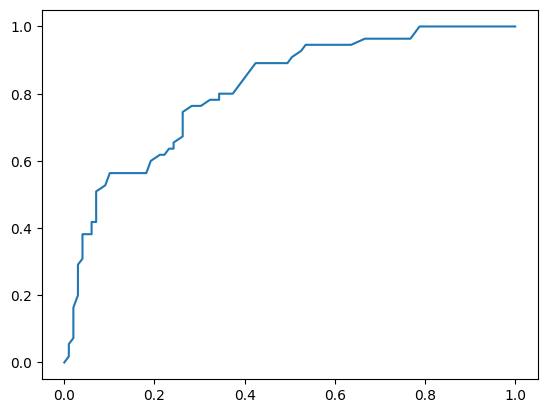

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data =pd.read_csv("/content/diabetes.csv")

x = data.drop(columns="Outcome")
y = data["Outcome"]

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

plt.figure()
plt.plot(fpr,tpr,label="Random Forest (AUC = %0.2f)"%roc_auc)

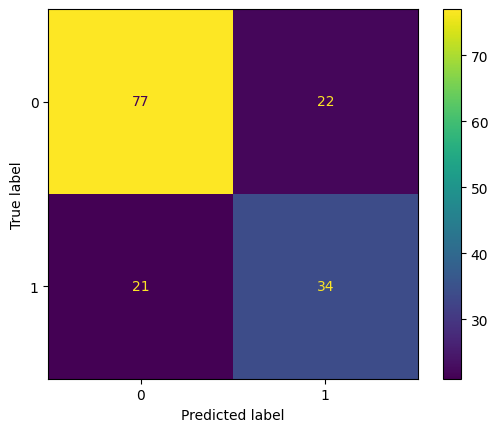

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv("/content/diabetes.csv")

x= data.drop(columns="Outcome",axis =1)
y= data["Outcome"]

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot()
plt.show()

